<a href="https://colab.research.google.com/github/MrEwdew/DeepLearning25/blob/main/week_1/CIFAR10-ShallowLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1: CIFAR10 Challenge

**CIFAR10** (http://www.cs.toronto.edu/~kriz/cifar.html) is one of the most famous ML data sets.

## Data
* 32x32 color images
* in 10 classes
* 50k training images
* 10k test images



<img src="https://production-media.paperswithcode.com/datasets/CIFAR-10-0000000431-b71f61c0_U5n3Glr.jpg" width=700>

In [1]:
#get data
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [2]:
#traindata: 50k 32X32 rgb images
X_train.shape

(50000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
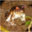

In [3]:
X_train[0]

In [4]:
#labels
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [5]:
X_train[0][0][0]

array([59, 62, 63], dtype=uint8)

## Task: build the best classifier (with feature extration) using the methods you know from ML1+2
* work in small teams (2-4)
* use NumPy pre-processing, feature extraction and hyer-parameter tuning in Scikit-Learn
* no Neural Networks!
* best test F1-Score winns!

In [6]:
import numpy as np

In [7]:

im_R = X_train.copy()
im_R[:,:, :, (1, 2)] = 0
im_G = X_train.copy()
im_G[:,:, :, (0, 2)] = 0
im_B = X_train.copy()
im_B[:,:, :, (0, 1)] = 0

array([[[ 59,   0,   0],
        [ 43,   0,   0],
        [ 50,   0,   0],
        ...,
        [158,   0,   0],
        [152,   0,   0],
        [148,   0,   0]],

       [[ 16,   0,   0],
        [  0,   0,   0],
        [ 18,   0,   0],
        ...,
        [123,   0,   0],
        [119,   0,   0],
        [122,   0,   0]],

       [[ 25,   0,   0],
        [ 16,   0,   0],
        [ 49,   0,   0],
        ...,
        [118,   0,   0],
        [120,   0,   0],
        [109,   0,   0]],

       ...,

       [[208,   0,   0],
        [201,   0,   0],
        [198,   0,   0],
        ...,
        [160,   0,   0],
        [ 56,   0,   0],
        [ 53,   0,   0]],

       [[180,   0,   0],
        [173,   0,   0],
        [186,   0,   0],
        ...,
        [184,   0,   0],
        [ 97,   0,   0],
        [ 83,   0,   0]],

       [[177,   0,   0],
        [168,   0,   0],
        [179,   0,   0],
        ...,
        [216,   0,   0],
        [151,   0,   0],
        [123,   0,   0]]], dtype=uint8)
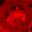

In [8]:
im_R[0]

array([[[  0,  62,   0],
        [  0,  46,   0],
        [  0,  48,   0],
        ...,
        [  0, 132,   0],
        [  0, 125,   0],
        [  0, 124,   0]],

       [[  0,  20,   0],
        [  0,   0,   0],
        [  0,   8,   0],
        ...,
        [  0,  88,   0],
        [  0,  83,   0],
        [  0,  87,   0]],

       [[  0,  24,   0],
        [  0,   7,   0],
        [  0,  27,   0],
        ...,
        [  0,  84,   0],
        [  0,  84,   0],
        [  0,  73,   0]],

       ...,

       [[  0, 170,   0],
        [  0, 153,   0],
        [  0, 161,   0],
        ...,
        [  0, 133,   0],
        [  0,  31,   0],
        [  0,  34,   0]],

       [[  0, 139,   0],
        [  0, 123,   0],
        [  0, 144,   0],
        ...,
        [  0, 148,   0],
        [  0,  62,   0],
        [  0,  53,   0]],

       [[  0, 144,   0],
        [  0, 129,   0],
        [  0, 142,   0],
        ...,
        [  0, 184,   0],
        [  0, 118,   0],
        [  0,  92,   0]]], dtype=uint8)
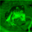

In [9]:
im_G[0]

array([[[  0,   0,  63],
        [  0,   0,  45],
        [  0,   0,  43],
        ...,
        [  0,   0, 108],
        [  0,   0, 102],
        [  0,   0, 103]],

       [[  0,   0,  20],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,  55],
        [  0,   0,  50],
        [  0,   0,  57]],

       [[  0,   0,  21],
        [  0,   0,   0],
        [  0,   0,   8],
        ...,
        [  0,   0,  50],
        [  0,   0,  50],
        [  0,   0,  42]],

       ...,

       [[  0,   0,  96],
        [  0,   0,  34],
        [  0,   0,  26],
        ...,
        [  0,   0,  70],
        [  0,   0,   7],
        [  0,   0,  20]],

       [[  0,   0,  96],
        [  0,   0,  42],
        [  0,   0,  30],
        ...,
        [  0,   0,  94],
        [  0,   0,  34],
        [  0,   0,  34]],

       [[  0,   0, 116],
        [  0,   0,  94],
        [  0,   0,  87],
        ...,
        [  0,   0, 140],
        [  0,   0,  84],
        [  0,   0,  72]]], dtype=uint8)
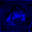

In [10]:
im_B[0]

In [11]:
from sklearn.preprocessing import StandardScaler

X_train_norm, X_test_norm = X_train/255, X_test/255
X_train_norm_flat, X_test_norm_flat = X_train_norm.reshape(X_train_norm.shape[0], -1), X_test_norm.reshape(X_test_norm.shape[0], -1)

X_train_norm_flat.shape
#X_train_norm = StandardScaler().fit_transform(X_train)

(50000, 3072)

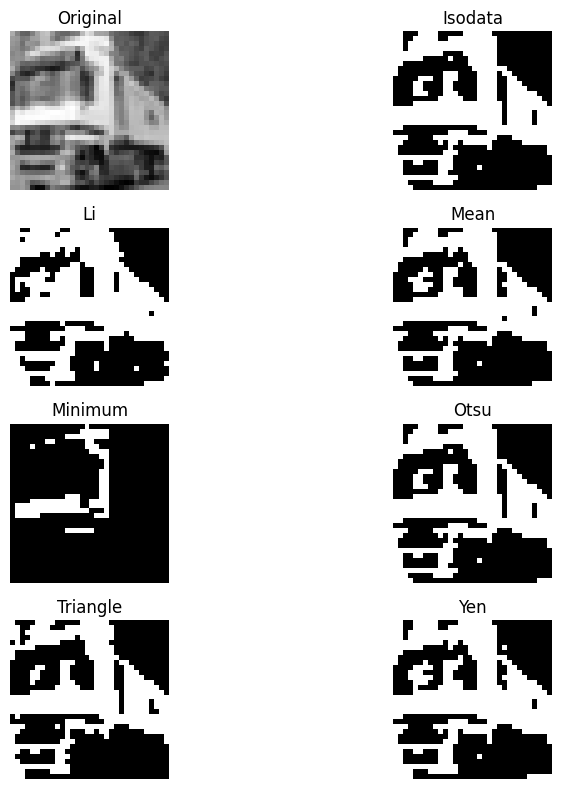

In [12]:
import skimage as ski
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import measure


image = rgb2gray(X_train[1])
thresh = ski.filters.threshold_mean(image)
binary = image > thresh


fig1, ax1 = ski.filters.try_all_threshold(image, figsize=(10, 8), verbose=False)


plt.show()

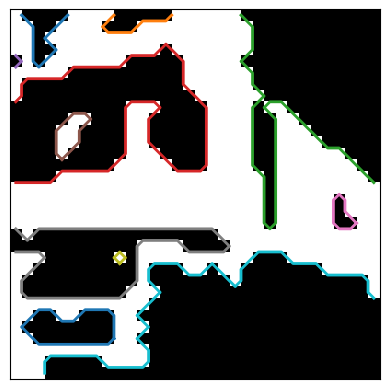

In [13]:
image = rgb2gray(X_train[1])
thresh = ski.filters.threshold_triangle(image)
binary = image > thresh

contours = measure.find_contours(binary, 0.5)

# Display the image and plot all contours found
fig2, ax2 = plt.subplots()
ax2.imshow(binary, cmap=plt.cm.gray)

for contour in contours:
    ax2.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax2.axis('image')
ax2.set_xticks([])
ax2.set_yticks([])
plt.show()

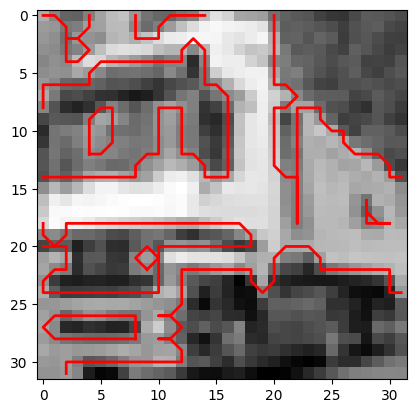

In [14]:
from shapely.geometry.polygon import LinearRing, Polygon


image = rgb2gray(X_train[1])
thresh = ski.filters.threshold_triangle(image)
binary = image > thresh

contours = measure.find_contours(binary, 0.5)

kontur_test = np.vstack(contours)
#print(kontur_test[0])
#print(contours[0])

polygons = []
for contour in contours:
    polygon = np.round(contour).astype(int)
    polygons.append(polygon)

fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)

for polygon in polygons:
    ax.plot(polygon[:, 1], polygon[:, 0], color='red', linewidth=2)
#ax.plot(kontur_test[:, 1], kontur_test[:, 0], color='red', linewidth=2)
plt.show()


#for i, polygon in enumerate(polygons):
#    print(f"Polygon {i+1}: {polygon}")

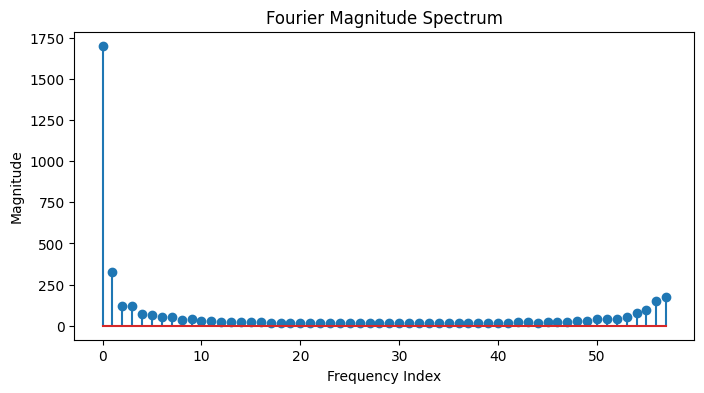

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def polygon_to_fourier(vertices):
    """Computes the Fourier spectrum of a polygon given its vertices."""
    # Convert polygon vertices to complex numbers
    z = np.array([x + 1j * y for x, y in vertices])

    # Compute the Discrete Fourier Transform (DFT)
    Z = np.fft.fft(z)

    # Compute magnitude spectrum
    magnitude = np.abs(Z)

    return Z, magnitude

def plot_fourier_spectrum(magnitude):
    """Plots the Fourier magnitude spectrum."""
    plt.figure(figsize=(8, 4))
    plt.stem(magnitude)
    plt.xlabel("Frequency Index")
    plt.ylabel("Magnitude")
    plt.title("Fourier Magnitude Spectrum")
    plt.show()

# Example polygon (square)
polygon = [(0, 0), (1, 0), (1, 1), (0, 1)]

# Compute Fourier spectrum
Z, magnitude = polygon_to_fourier(contours[9])

# Plot the spectrum
plot_fourier_spectrum(magnitude)

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_norm_flat)
X_test_scaled = scaler.transform(X_test_norm_flat)


In [19]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

svm = RandomForestClassifier()
svm = svm.fit(X_train_scaled, y_train)



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


KeyboardInterrupt: 

In [ ]:
y_pred = svm.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
